In [1]:
## import necessary modules
import glob 
import pandas as pd
from pprint import pprint
import os

In [2]:
## define years and quarters for processing data
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
quarters = [1,2,3,4]

## create a list of drugs of interest
## you need to modify this list as necessary
## the current drugs are for ADHD
## You can collect the list of drugs from an online website such as Drugs.com
adhd_drugs = ["Albuterol", "albuterol", "ALBUTEROL", "ProAir HFA", "ProAir", "proair", "ProAir HFA", "ProAir RespiClick", "Ventolin HFA", "Proventil HFA", "VoSpire ER", "THEOPHYLLINE", "theophylline", "Theophylline", "ELIXOPHYLLIN", "Elixophyllin", "Theo-24", "Theochron", "THEOCHRON", "Aminophylline", "MONTELUKAST", "Montelukast", "montelukast", "Singulair", "singulair", "SINGULAIR", "Budesonide/formoterol", "Budesonide/Formoterol", "budesonide/formoterol", "BUDESONIDE/FORMOTEROL", "SYMBICORT", "Symbicort", "symbicort", "formoterol fumarate dihydrate"]


In [3]:
for year in years:
    for q in quarters:    
        ## get the file names with the designated patterns
        files = glob.glob('Data1/*' + str(year) +'*' + str(q) + '/ascii/*' + str(q) + '.txt',  
                           recursive = True) 
        for file in files: 
            print(file)
            ## read files according to their names
            if "demo" in file.lower():
                demo = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False) 
            elif "drug" in file.lower():
                drug = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False)
            elif "indi" in file.lower():
                indi = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "outc" in file.lower():
                outc = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "reac" in file.lower():
                reac = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False )
            elif "rpsr" in file.lower():
                rpsr = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "ther" in file.lower():
                ther = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False )
        ## create a mask for the data associated with ADHD
        ## delete the next statement if you want to have the entire data
        ## check "list comprehension", a new Python syntax, at the following site: 
        ## https://www.w3schools.com/python/python_lists_comprehension.asp
        mask_for_adhd = [str(med).lower() in adhd_drugs for med in drug["drugname"]]
        ## apply the mask to the columns and overwrite the drug table
        drug = drug[mask_for_adhd]
        ## join tables
        inner_join = pd.merge(left= demo, right = drug, how = "inner", 
                      left_on = "primaryid", right_on = "primaryid")
        ## change duplicate column names and remove one of them
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        inner_join = pd.merge(left= inner_join, right = indi, how = "inner", 
                      left_on = ["primaryid", "drug_seq"], right_on = ["primaryid", "indi_drug_seq"] )
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        inner_join = inner_join.drop(labels= ["indi_drug_seq"], axis= 1)
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        inner_join = pd.merge(left= inner_join, right = reac, how = "inner", 
                      left_on = "primaryid", right_on = "primaryid")
        # drop the duplicate abbreviation column
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        # change column name
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        ## save the joined tables as csv files in the designated directories
        path = 'Result/' + str(year)+'/Quarterly'
        if not os.path.exists(path):
            os.makedirs(path)
        inner_join.to_csv(path + '/' + str(year) + '_' + str(q) + '.csv')

Data1\faers_ascii_2013q1\ascii\DEMO13Q1.txt
Data1\faers_ascii_2013q1\ascii\DRUG13Q1.txt
Data1\faers_ascii_2013q1\ascii\INDI13Q1.txt
Data1\faers_ascii_2013q1\ascii\OUTC13Q1.txt
Data1\faers_ascii_2013q1\ascii\REAC13Q1.txt
Data1\faers_ascii_2013q1\ascii\RPSR13Q1.txt
Data1\faers_ascii_2013q1\ascii\THER13Q1.txt
Data1\faers_ascii_2013q2\ascii\DEMO13Q2.txt
Data1\faers_ascii_2013q2\ascii\DRUG13Q2.txt
Data1\faers_ascii_2013q2\ascii\INDI13Q2.txt
Data1\faers_ascii_2013q2\ascii\OUTC13Q2.txt
Data1\faers_ascii_2013q2\ascii\REAC13Q2.txt
Data1\faers_ascii_2013q2\ascii\RPSR13Q2.txt
Data1\faers_ascii_2013q2\ascii\THER13Q2.txt
Data1\faers_ascii_2013q3\ascii\DEMO13Q3.txt
Data1\faers_ascii_2013q3\ascii\DRUG13Q3.txt
Data1\faers_ascii_2013q3\ascii\INDI13Q3.txt
Data1\faers_ascii_2013q3\ascii\OUTC13Q3.txt
Data1\faers_ascii_2013q3\ascii\REAC13Q3.txt
Data1\faers_ascii_2013q3\ascii\RPSR13Q3.txt
Data1\faers_ascii_2013q3\ascii\THER13Q3.txt
Data1\faers_ascii_2013q4\ascii\DEMO13Q4.txt
Data1\faers_ascii_2013q4\ascii\D

In [4]:
## open CSV files
for year in years:
    files = glob.glob('Result/' + str(year) + '/Quarterly/' + str(year) + '*.csv', \
                           recursive = True)
    ## create an empty data frame for yearly data
    n_df = pd.DataFrame()
    ## read quarterly files
    for file in files:
        print(file)
        df = pd.read_csv(file, low_memory=False)
        ## concatenate each quartely files to "n_df" dataframe
        n_df = pd.concat([n_df,df],axis=0) 
    n_df.reset_index(inplace=True)
    ## "index" row is added, so we drop this
    n_df.drop(['index'], axis=1, inplace=True) 
    path1 = 'Result/' + str(year) + '/Yearly'
    if not os.path.exists(path1):
        os.makedirs(path1)  
    ## save the joined tables as csv files in the designated directories
    n_df.to_csv(path1 + '/' + str(year) + '_Yearly.csv', index=False)

Result/2013/Quarterly\2013_1.csv
Result/2013/Quarterly\2013_2.csv
Result/2013/Quarterly\2013_3.csv
Result/2013/Quarterly\2013_4.csv
Result/2014/Quarterly\2014_1.csv
Result/2014/Quarterly\2014_2.csv
Result/2014/Quarterly\2014_3.csv
Result/2014/Quarterly\2014_4.csv
Result/2015/Quarterly\2015_1.csv
Result/2015/Quarterly\2015_2.csv
Result/2015/Quarterly\2015_3.csv
Result/2015/Quarterly\2015_4.csv
Result/2016/Quarterly\2016_1.csv
Result/2016/Quarterly\2016_2.csv
Result/2016/Quarterly\2016_3.csv
Result/2016/Quarterly\2016_4.csv
Result/2017/Quarterly\2017_1.csv
Result/2017/Quarterly\2017_2.csv
Result/2017/Quarterly\2017_3.csv
Result/2017/Quarterly\2017_4.csv
Result/2018/Quarterly\2018_1.csv
Result/2018/Quarterly\2018_2.csv
Result/2018/Quarterly\2018_3.csv
Result/2018/Quarterly\2018_4.csv
Result/2019/Quarterly\2019_1.csv
Result/2019/Quarterly\2019_2.csv
Result/2019/Quarterly\2019_3.csv
Result/2019/Quarterly\2019_4.csv
Result/2020/Quarterly\2020_1.csv
Result/2020/Quarterly\2020_2.csv
Result/202

In [5]:
## create an empty data frame for all data
new_df = pd.DataFrame()
## read yearly files
for year in years:
    files = glob.glob('Result/' + str(year) + '/Yearly/' + str(year) + '*.csv',  
                           recursive = True)
    df = pd.read_csv(files[0],low_memory=False)
    ## concatenate each quartely files to "n_df" dataframe
    new_df = pd.concat([new_df,df],axis=0)
    
new_df.reset_index(inplace=True)
## "index" row is added, so we drop this
new_df.drop(['index'], axis=1, inplace=True)
new_df = new_df.drop(labels= ["Unnamed: 0"], axis= 1)
path2 = 'Result/Final'

if not os.path.exists(path2):
    os.makedirs(path2)
## Save the final data
new_df.to_csv('Result/Final/top50drugs.csv', index=False)

In [6]:
count = new_df.shape[0]
print(count)


705728


In [7]:
print(new_df)

        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
0        62263022  6226302            2        F  20060705.0  20130313.0   
1        62263022  6226302            2        F  20060705.0  20130313.0   
2        62263022  6226302            2        F  20060705.0  20130313.0   
3        62263022  6226302            2        F  20060705.0  20130313.0   
4        63126712  6312671            2        F    200502.0  20130218.0   
...           ...      ...          ...      ...         ...         ...   
705723  990796020  9907960           20        F  20120724.0  20201105.0   
705724  990796020  9907960           20        F  20120724.0  20201105.0   
705725  990796020  9907960           20        F  20120724.0  20201105.0   
705726  990796020  9907960           20        F  20120724.0  20201105.0   
705727   99945955  9994595            5        F  20140121.0  20201224.0   

        init_fda_dt    fda_dt rept_cod  \
0          20070130  20130326      EXP   
1  

In [8]:
# Find all rows where "Asthma" (or variations of this word) appears in indi_pt or pt columns
asthma_rows = new_df[new_df['indi_pt'].str.contains('Asthma|asthma|ASTHMA') | new_df['pt'].str.contains('Asthma|asthma|ASTHMA')]

# Print the resulting DataFrame
print(asthma_rows)

        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
0        62263022  6226302            2        F  20060705.0  20130313.0   
1        62263022  6226302            2        F  20060705.0  20130313.0   
2        62263022  6226302            2        F  20060705.0  20130313.0   
3        62263022  6226302            2        F  20060705.0  20130313.0   
4        63126712  6312671            2        F    200502.0  20130218.0   
...           ...      ...          ...      ...         ...         ...   
705671  986902720  9869027           20        F  20121008.0  20201217.0   
705672   98757794  9875779            4        F  20130612.0  20201013.0   
705674   98757794  9875779            4        F  20130612.0  20201013.0   
705679  989327135  9893271           35        F  20130603.0  20201013.0   
705704  990796020  9907960           20        F  20120724.0  20201105.0   

        init_fda_dt    fda_dt rept_cod                   mfr_num  ...  \
0          200

In [9]:
print(new_df.columns)


Index(['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event_dt', 'mfr_dt',
       'init_fda_dt', 'fda_dt', 'rept_cod', 'mfr_num', 'mfr_sndr', 'age',
       'age_cod', 'gndr_cod', 'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr',
       'occp_cod', 'reporter_country', 'occr_country', 'drug_seq', 'role_cod',
       'drugname', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr',
       'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num',
       'dose_amt', 'dose_unit', 'dose_form', 'dose_freq', 'indi_pt', 'pt',
       'auth_num', 'lit_ref', 'age_grp', 'sex', 'prod_ai', 'drug_rec_act'],
      dtype='object')


In [10]:
## Just to examine attributes' of duplicated instances
duplicateRowsDF = new_df[new_df.duplicated(["primaryid","caseid","drugname","pt"], keep = False)]

In [11]:
new_df.drop_duplicates(subset=["primaryid","caseid","drugname","pt"], keep = "first", inplace = True)

In [12]:
new_df.shape

(618704, 47)

In [13]:
age_mask = (new_df["age"] >= 18) & (new_df["age"] <= 65) 
age_mask.value_counts()

False    319713
True     298991
Name: age, dtype: int64

In [14]:
new_df = new_df[age_mask]
new_df.shape

(298991, 47)

In [15]:
new_df.head(20)

primaryid   caseid  caseversion i_f_code  event_dt      mfr_dt  \
4    63126712  6312671            2        F  200502.0  20130218.0   
5    63126712  6312671            2        F  200502.0  20130218.0   
6    63126712  6312671            2        F  200502.0  20130218.0   
7    63126712  6312671            2        F  200502.0  20130218.0   
8    63126712  6312671            2        F  200502.0  20130218.0   
9    63126712  6312671            2        F  200502.0  20130218.0   
10   63228565  6322856            5        F    2006.0  20130214.0   
11   63228565  6322856            5        F    2006.0  20130214.0   
12   63228565  6322856            5        F    2006.0  20130214.0   
13   63228565  6322856            5        F    2006.0  20130214.0   
14   63228565  6322856            5        F    2006.0  20130214.0   
15   63228565  6322856            5        F    2006.0  20130214.0   
16   63228565  6322856            5        F    2006.0  20130214.0   
17   63228565  6322856            5        F    2006.0  20130214.0   
18  642916618  6429166           18        F  200604.0  20130321.0   
19  642916618  6429166           18        F  200604.0  20130321.0   
20  642916618  6429166           18        F  200604.0  20130321.0   
21  642916618  6429166           18        F  200604.0  20130321.0   
22  642916618  6429166           18        F  200604.0  20130321.0   
23  642916618  6429166           18        F  200604.0  20130321.0   

    init_fda_dt    fda_dt rept_cod  \
4      20070515  20130222      EXP   
5      20070515  20130222      EXP   
6      20070515  20130222      EXP   
7      20070515  20130222      EXP   
8      20070515  20130222      EXP   
9      20070515  20130222      EXP   
10     20070530  20130225      EXP   
11     20070530  20130225      EXP   
12     20070530  20130225      EXP   
13     20070530  20130225      EXP   
14     20070530  20130225      EXP   
15     20070530  20130225      EXP   
16     20070530  20130225      EXP   
17     20070530  20130225      EXP   
18     20070927  20130328      EXP   
19     20070927  20130328      EXP   
20     20070927  20130328      EXP   
21     20070927  20130328      EXP   
22     20070927  20130328      EXP   
23     20070927  20130328      EXP   

                                              mfr_num  ... dose_form  \
4                                     US-RB-3739-2006  ...       NaN   
5                                     US-RB-3739-2006  ...       NaN   
6                                     US-RB-3739-2006  ...       NaN   
7                                     US-RB-3739-2006  ...       NaN   
8                                     US-RB-3739-2006  ...       NaN   
9                                     US-RB-3739-2006  ...       NaN   
10                         US-ASTRAZENECA-2007UW12642  ...       NaN   
11                         US-ASTRAZENECA-2007UW12642  ...       NaN   
12                         US-ASTRAZENECA-2007UW12642  ...       NaN   
13                         US-ASTRAZENECA-2007UW12642  ...       NaN   
14                         US-ASTRAZENECA-2007UW12642  ...       NaN   
15                         US-ASTRAZENECA-2007UW12642  ...       NaN   
16                         US-ASTRAZENECA-2007UW12642  ...       NaN   
17                         US-ASTRAZENECA-2007UW12642  ...       NaN   
18  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
19  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
20  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
21  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
22  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   
23  US-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2006-B...  ...    TABLET   

    dose_freq           indi_pt                          pt auth_num lit_ref  \
4         NaN            Asthma            Abortion induced      NaN     NaN   
5         NaN            Asthma    Drug withdrawal syndrome  

In [16]:
baskets = []
num = 1
temp_basket = []
last_line = False
for index, row in new_df.iterrows():
    ## check whether the new row is from the same patient or not
    ## If it is the same patient, the new row will be put into the same basket
    ## If not, create a new basket.
    if num == 1:
        previous_id = row["caseid"]
        current_id = row["caseid"]
        first_line = True
    elif num == new_df.shape[0]:
        last_line = True
        first_line = False
        previous_id = current_id
        current_id = row["caseid"]
    else:
        first_line = False
        previous_id = current_id
        current_id = row["caseid"]
    ## if the new row is from the same patient, only add the adverse drug reaction
    if previous_id == current_id :
        same_patient = True
    else:
        same_patient = False
    if same_patient:
        temp_basket.append(row["pt"])
        if first_line:
            temp_basket.append(row["drugname"])
    else:
        baskets.append(temp_basket)
        temp_basket = []
        temp_basket.append(row["drugname"])
        temp_basket.append(row["pt"])
    if last_line:
        baskets.append(temp_basket)
    num += 1
    

In [17]:
len(baskets)

30927

In [18]:
baskets[1]

['ALBUTEROL',
 'Arteriovenous malformation',
 'Convulsion',
 'Drug hypersensitivity',
 'Dysphonia',
 'Dyspnoea',
 'Headache',
 'Pruritus',
 'Urticaria']

In [19]:
items = list()
for basket in baskets:
    items.extend(basket)
print(set(items))
print(len(set(items)))

{'Sternal fracture', 'Hepatitis C RNA fluctuation', 'Dissociative fugue', 'Trichomoniasis', 'Joint injury', 'Incorrect dose administered by product', 'Hip fracture', 'Hair colour changes', 'Electrocardiogram QT prolonged', 'Acute cardiac event', 'Type 2 diabetes mellitus', 'Osteonecrosis of jaw', 'Ulcerative duodenitis', 'Oophorectomy bilateral', 'Hospice care', 'Status migrainosus', 'Periorbital cellulitis', 'Atrioventricular block', 'Albumin globulin ratio decreased', 'Perineal fistula', 'Allergy to chemicals', 'Injection site discolouration', 'Oropharyngeal pain', 'Neuroma', 'Stress', 'Autonomic nervous system imbalance', 'Drug dispensing error', 'Laparoscopic surgery', 'Steroid withdrawal syndrome', 'Gastroenteritis', 'Breast tenderness', 'Groin pain', 'Central pain syndrome', 'White blood cell count increased', 'Malnutrition', 'Bronchitis chronic', 'Mantle cell lymphoma', 'Tooth erosion', 'Cytomegalovirus infection', 'Product closure issue', 'Muscle atrophy', 'Endocarditis', 'Spon

In [20]:
# Create empty list to contain the converted data
converted_vals = []
for row in baskets:
    labels = {}
    # Find items that do not occur in the transaction
    not_occurred = list(set(items) - set(row))
    # Find items that occur in the transaction
    occurred = list(set(items).intersection(row))
    for nc in not_occurred:
        labels[nc] = 0
    for occ in occurred:
        labels[occ] = 1
    converted_vals.append(labels)

converted_basket = pd.DataFrame(converted_vals)
print(converted_basket.head())

   Sternal fracture  Diabetic metabolic decompensation  \
0                 0                                  0   
1                 0                                  0   
2                 0                                  0   
3                 0                                  0   
4                 0                                  0   

   Hepatitis C RNA fluctuation  Selective IgA immunodeficiency  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   Dissociative fugue  Trichomoniasis  Joint injury  Long QT syndrome  \
0                   0               0             0                 0   
1                   0               0             0                 0   
2                   0              

In [21]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

frequent_itemsets = apriori(converted_basket, min_support=0.05
                            , use_colnames=True)

print(frequent_itemsets.head())

C:\Users\chera\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support       itemsets
0  0.195428     (Dyspnoea)
1  0.053675    (Influenza)
2  0.104601     (Headache)
3  0.054257    (Sinusitis)
4  0.195751  (MONTELUKAST)


In [57]:
frequent_itemsets = apriori(converted_basket, min_support=0.05, use_colnames=True)

print(frequent_itemsets)

C:\Users\chera\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                      itemsets
0   0.195428                    (Dyspnoea)
1   0.053675                   (Influenza)
2   0.104601                    (Headache)
3   0.054257                   (Sinusitis)
4   0.195751                 (MONTELUKAST)
5   0.050829                     (Anxiety)
6   0.058202                   (Dizziness)
7   0.056941            (Chest discomfort)
8   0.064636    (Blood pressure increased)
9   0.052931            (Hypersensitivity)
10  0.080771             (Nasopharyngitis)
11  0.095839                    (Wheezing)
12  0.076761                   (Pneumonia)
13  0.062308            (Productive cough)
14  0.385585                   (SINGULAIR)
15  0.050441                  (Arthralgia)
16  0.206519                      (Asthma)
17  0.072623                        (Pain)
18  0.051702                  (Bronchitis)
19  0.126782                       (Cough)
20  0.340285                   (SYMBICORT)
21  0.051314                   (Diarrhoea)
22  0.09076

In [58]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

             antecedents           consequents  antecedent support  \
0             (Wheezing)            (Dyspnoea)            0.095839   
1             (Dyspnoea)            (Wheezing)            0.195428   
2               (Asthma)            (Dyspnoea)            0.206519   
3             (Dyspnoea)              (Asthma)            0.195428   
4                (Cough)            (Dyspnoea)            0.126782   
5             (Dyspnoea)               (Cough)            0.195428   
6            (SYMBICORT)            (Dyspnoea)            0.340285   
7             (Dyspnoea)           (SYMBICORT)            0.195428   
8            (SINGULAIR)            (Headache)            0.385585   
9             (Headache)           (SINGULAIR)            0.104601   
10              (Asthma)            (Wheezing)            0.206519   
11            (Wheezing)              (Asthma)            0.095839   
12            (Wheezing)               (Cough)            0.095839   
13               (Co

In [64]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.3) ].sort_values(by=['lift'], ascending=False)

antecedents         consequents  antecedent support  \
32            (Wheezing)  (Asthma, Dyspnoea)            0.095839   
29    (Asthma, Dyspnoea)          (Wheezing)            0.099201   
13               (Cough)          (Wheezing)            0.126782   
12            (Wheezing)             (Cough)            0.095839   
38               (Cough)  (Asthma, Dyspnoea)            0.126782   
35    (Asthma, Dyspnoea)             (Cough)            0.099201   
30  (Wheezing, Dyspnoea)            (Asthma)            0.066964   
28    (Asthma, Wheezing)          (Dyspnoea)            0.072299   
34       (Asthma, Cough)          (Dyspnoea)            0.072332   
10              (Asthma)          (Wheezing)            0.206519   
11            (Wheezing)            (Asthma)            0.095839   
0             (Wheezing)          (Dyspnoea)            0.095839   
1             (Dyspnoea)          (Wheezing)            0.195428   
36     (Cough, Dyspnoea)            (Asthma)            0.076179   
5             (Dyspnoea)             (Cough)            0.195428   
4                (Cough)          (Dyspnoea)            0.126782   
21               (Cough)            (Asthma)            0.126782   
20              (Asthma)             (Cough)            0.206519   
25             (Malaise)            (Asthma)            0.102047   
3             (Dyspnoea)            (Asthma)            0.195428   
2               (Asthma)          (Dyspnoea)            0.206519   
7             (Dyspnoea)         (SYMBICORT)            0.195428   
9             (Headache)         (SINGULAIR)            0.104601   
19             (Fatigue)         (SINGULAIR)            0.113137   
27               (Cough)         (SYMBICORT)            0.126782   
22              (Asthma)         (SYMBICORT)            0.206519   
14              (Asthma)         (SINGULAIR)            0.206519   
17               (Cough)         (SINGULAIR)            0.126782   

    consequent support   support  confidence      lift  leverage  conviction  
32            0.099201  0.055291    0.576923  5.815678  0.045784    2.129160  
29            0.095839  0.055291    0.557366  5.815678  0.045784    2.042686  
13            0.095839  0.052575    0.414690  4.326964  0.040425    1.544757  
12            0.126782  0.052575    0.548583  4.326964  0.040425    1.934392  
38            0.099201  0.052381    0.413160  4.164862  0.039804    1.534998  
35            0.126782  0.052381    0.528031  4.164862  0.039804    1.850160  
30            0.206519  0.055291    0.825688  3.998130  0.041462    4.552078  
28            0.195428  0.055291    0.764758  3.913251  0.041162    3.420196  
34            0.195428  0.052381    0.724184  3.705633  0.038246    2.917063  
10            0.095839  0.072299    0.350086  3.652872  0.052507    1.391202  
11            0.206519  0.072299    0.754386  3.652872  0.052507    3.230603  
0             0.195428  0.066964    0.698718  3.575323  0.048235    2.670494  
1             0.095839  0.066964    0.342654  3.575323  0.048235    1.375472  
36            0.206519  0.052381    0.687606  3.329512  0.036649    2.540003  
5             0.126782  0.076179    0.389808  3.074622  0.051403    1.431054  
4             0.195428  0.076179    0.600867  3.074622  0.051403    2.015800  
21            0.206519  0.072332    0.570518  2.762549  0.046149    1.847530  
20            0.126782  0.072332    0.350243  2.762549  0.046149    1.343913  
25            0.206519  0.052996    0.519328  2.514681  0.031921    1.650776  
3             0.206519  0.099201    0.507611  2.457943  0.058842    1.611493  
2             0.195428  0.099201    0.480351  2.457943  0.058842    1.548298  
7             0.340285  0.090115    0.461118  1.355094  0.023614    1.224230  
9             0.385585  0.050247    0.480371  1.245822  0.009915    1.182410  
19            0.385585  0.052899    0.467562  1.212603  0.009275    1.153965  
27            0.340285  0.052284    0.412395  1.211909  0.009142 

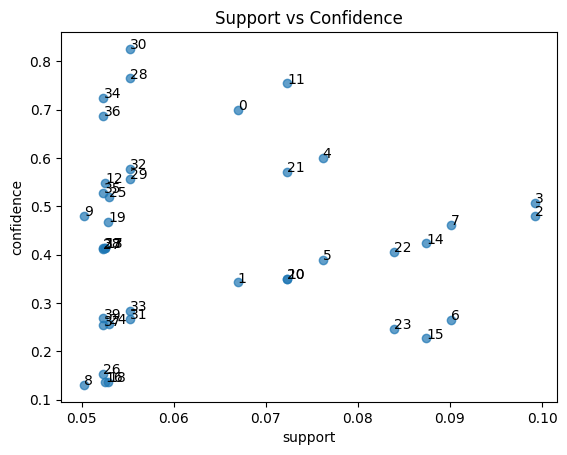

In [65]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [66]:
# group the data by 'Suspect Product Names' and count the number of occurrences
count_df = new_df.groupby('drugname').size().reset_index(name='Count')

# sort the data by 'Count' in descending order
sorted_df = count_df.sort_values(by='Count', ascending=False)

# print the top 10 results
print(sorted_df.head(10))

                 drugname   Count
13              SINGULAIR  126878
14              SYMBICORT  112377
7             MONTELUKAST   43046
17           THEOPHYLLINE    6972
0               ALBUTEROL    5563
9                  PROAIR    1242
18           Theophylline    1171
1               Albuterol     482
16              Symbicort     248
2   BUDESONIDE/FORMOTEROL     246


In [67]:
# filter rows where 'drugname' is 'MONTELUKAST'
namesearch_df = new_df[new_df['drugname'] == 'SINGULAIR']

# print the results
print(namesearch_df)


        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
18      642916618  6429166           18        F    200604.0  20130321.0   
19      642916618  6429166           18        F    200604.0  20130321.0   
20      642916618  6429166           18        F    200604.0  20130321.0   
21      642916618  6429166           18        F    200604.0  20130321.0   
22      642916618  6429166           18        F    200604.0  20130321.0   
...           ...      ...          ...      ...         ...         ...   
705723  990796020  9907960           20        F  20120724.0  20201105.0   
705724  990796020  9907960           20        F  20120724.0  20201105.0   
705725  990796020  9907960           20        F  20120724.0  20201105.0   
705726  990796020  9907960           20        F  20120724.0  20201105.0   
705727   99945955  9994595            5        F  20140121.0  20201224.0   

        init_fda_dt    fda_dt rept_cod  \
18         20070927  20130328      EXP   
19 

In [29]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [68]:
# filter rows where 'Suspect Product Names' is 'Symbicort'
drugname_df = new_df[new_df['drugname'] == 'SINGULAIR']

# extract words from 'Reactions' column and tokenize them
reactions = drugname_df['pt'].str.lower().str.cat(sep=' ')
tokens = word_tokenize(reactions)

# remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# calculate word frequency distribution
fdist = FreqDist(tokens)

# print the top 10 most frequent words
print(fdist.most_common(10))

[('pain', 6923), ('increased', 6060), ('decreased', 5165), ('disorder', 4406), ('blood', 4071), ('infection', 3831), ('asthma', 3494), ('cough', 3421), ('dyspnoea', 3417), ('respiratory', 3140)]


In [69]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords



In [70]:
tokenizer = RegexpTokenizer(r'\w+')
drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


C:\Users\chera\AppData\Local\Temp\ipykernel_6248\2864901946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


In [71]:
stop_words = set(stopwords.words('english'))
drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


C:\Users\chera\AppData\Local\Temp\ipykernel_6248\2917538086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [72]:
fdist = FreqDist([word for tokens in drugname_df['tokens'] for word in tokens])
sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)


In [73]:
for word, frequency in sorted_words[:10]:
    print(f"{word}: {frequency}")


pain: 6923
increased: 6060
decreased: 5165
disorder: 4406
blood: 4071
infection: 3831
asthma: 3545
cough: 3421
dyspnoea: 3417
respiratory: 3152


In [74]:
for index, row in drugname_df.iterrows():
    fdist = FreqDist(row['tokens'])
    sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
    print(f"Row {index}:")
    for word, frequency in sorted_words[:10]:
        print(f"{word}: {frequency}")


Row 18:
adverse: 1
drug: 1
reaction: 1
Row 19:
asthma: 1
Row 20:
burning: 1
sensation: 1
Row 21:
cough: 1
Row 22:
drug: 1
effect: 1
incomplete: 1
Row 23:
drug: 1
ineffective: 1
Row 24:
drug: 1
intolerance: 1
Row 25:
dyspnoea: 1
Row 26:
exercise: 1
tolerance: 1
decreased: 1
Row 27:
incorrect: 1
dose: 1
administered: 1
Row 28:
inflammation: 1
Row 29:
lung: 1
disorder: 1
Row 30:
oral: 1
fungal: 1
infection: 1
Row 31:
oral: 1
pain: 1
Row 32:
oropharyngeal: 1
pain: 1
Row 33:
painful: 1
respiration: 1
Row 34:
pneumonia: 1
Row 35:
product: 1
quality: 1
issue: 1
Row 36:
pulmonary: 1
congestion: 1
Row 37:
pulmonary: 1
function: 1
test: 1
decreased: 1
Row 38:
respiratory: 1
tract: 1
irritation: 1
Row 39:
wheezing: 1
Row 112:
dyspnoea: 1
Row 113:
erythema: 1
Row 114:
pruritus: 1
Row 115:
urticaria: 1
Row 116:
wheezing: 1
Row 120:
breast: 1
cancer: 1
female: 1
Row 142:
asthma: 1
Row 143:
blood: 1
pressure: 1
decreased: 1
Row 144:
chest: 1
discomfort: 1
Row 145:
cough: 1
Row 146:
dizziness: 1
Row 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Row 609352:
sputum: 1
discoloured: 1
Row 609353:
therapeutic: 1
product: 1
effect: 1
incomplete: 1
Row 609354:
type: 1
2: 1
diabetes: 1
mellitus: 1
Row 609355:
upper: 1
airway: 1
cough: 1
syndrome: 1
Row 609380:
headache: 1
Row 609381:
label: 1
use: 1
Row 609382:
sinus: 1
disorder: 1
Row 609469:
asthma: 1
Row 609470:
blood: 1
count: 1
abnormal: 1
Row 609471:
cardiac: 1
arrest: 1
Row 609472:
chest: 1
discomfort: 1
Row 609473:
chronic: 1
obstructive: 1
pulmonary: 1
disease: 1
Row 609474:
cough: 1
Row 609475:
dyspnoea: 1
Row 609476:
fev1: 1
fvc: 1
ratio: 1
decreased: 1
Row 609477:
loss: 1
personal: 1
independence: 1
daily: 1
activities: 1
Row 609478:
obstructive: 1
airways: 1
disorder: 1
Row 609479:
therapeutic: 1
product: 1
effect: 1
incomplete: 1
Row 609480:
throat: 1
clearing: 1
Row 609481:
wheezing: 1
Row 609483:
arthropathy: 1
Row 609484:
asthma: 1
Row 609485:
bronchial: 1
obstruction: 1
Row 609486:
cardiac: 1
murmur: 1
Row 609487:
conjunctivitis: 1
Row 609488:
fatigue: 1
Row 609489:

In [75]:
# create a new column to store the tokenized reactions
drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')

# initialize a dictionary to store the word frequencies
word_freq = {}

# loop through each row of the dataframe
for row in drugname_df.itertuples():
    # loop through each tokenized word in the row
    for word in row.Reactions_Tokenized:
        # ignore stop words and single character words
        if word not in set(stopwords.words('english')) and len(word) > 1:
            # increment the word frequency count in the dictionary
            word_freq[word] = word_freq.get(word, 0) + 1

# sort the dictionary by the word frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
for word, freq in sorted_word_freq[:1000]:
    print(f'{word}: {freq}')


C:\Users\chera\AppData\Local\Temp\ipykernel_6248\888490968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')


asthma: 3487
dyspnoea: 2718
cough: 2172
fatigue: 1970
headache: 1792
wheezing: 1718
malaise: 1702
nasopharyngitis: 1397
drug ineffective: 1322
pain: 1278
weight decreased: 1275
blood pressure increased: 1225
pneumonia: 1149
nausea: 1143
productive cough: 1116
hypersensitivity: 1037
chest discomfort: 1003
sinusitis: 996
bronchitis: 939
dizziness: 937
influenza: 908
pyrexia: 887
back pain: 852
arthralgia: 844
pruritus: 823
heart rate increased: 821
weight increased: 819
diarrhoea: 804
insomnia: 778
nasal congestion: 766
urticaria: 746
obstructive airways disorder: 735
sputum discoloured: 723
anxiety: 695
fall: 692
asthenia: 676
pain in extremity: 661
oropharyngeal pain: 658
feeling abnormal: 657
erythema: 636
dyspnoea exertional: 597
lower respiratory tract infection: 593
forced expiratory volume decreased: 588
vomiting: 582
injection site pain: 579
rash: 563
chest pain: 551
rhinorrhoea: 547
upper respiratory tract infection: 527
hypertension: 518
drug hypersensitivity: 484
depression: 4

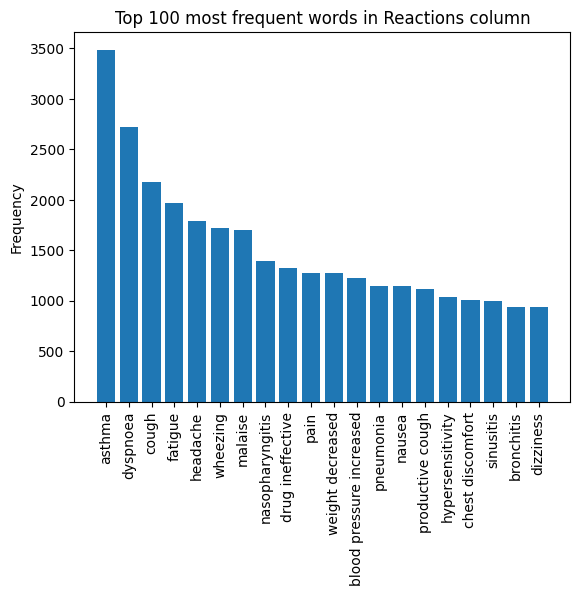

In [76]:
import matplotlib.pyplot as plt
from collections import Counter

# create a list of words from the 'Reactions' column
reactions = drugname_df['pt'].str.lower().str.cat(sep=',')

# split the reactions by comma and semi-colon
words = reactions.split(',') + [x.strip() for x in reactions.split(';')]

# count the frequency of each word
word_counts = Counter(words)

# create a list of the top 100 words and their counts
top_words = word_counts.most_common(20)

# create a bar chart
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 100 most frequent words in Reactions column')
plt.show()
